<a href="https://colab.research.google.com/github/woodstone10/data-collection/blob/main/review_scraping_NAVER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping and Analysis of customer review from NAVER shopping for LG전자 워시타워 W16WTA

---
Two methods,
- **BeautifulShop**: easy code, but difficult to move next page
- **Selenium**: more complicate, but possible to move next page, just read whole data


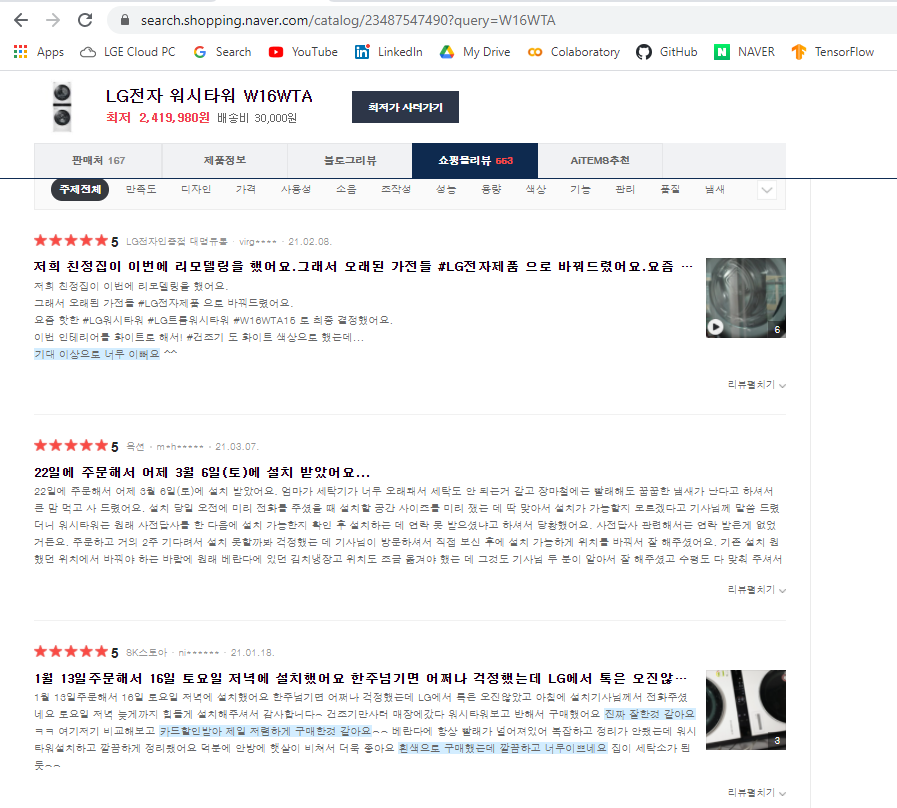

## **BeautifulShop**

---
Unfortunately, the same URL for all pages. So it is difficult to mage moving


In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

def get_NAVER_shopping_customer_review_bs(url):
  df = pd.DataFrame(columns=('title','score','market','date','review'))
  page = urllib.request.urlopen(url).read()
  bs = BeautifulSoup(page, 'html.parser')
  info_list = bs.find_all("div", {"class": "reviewItems_etc_area__2P8i3"})
  content_list = bs.find_all("div", {"class": "reviewItems_review__1eF8A"})

  idx = 0
  for i, j in zip(info_list, content_list):
    score = i.find("span", {"class": "reviewItems_average__16Ya-"}).get_text().replace('평점', '')
    market = i.findAll("span", {"class": "reviewItems_etc__1YqVF"})[0].get_text()
    date = i.findAll("span", {"class": "reviewItems_etc__1YqVF"})[2].get_text() 
    title = j.find("em", {"class": "reviewItems_title__39Z8H"}).get_text()       
    review = j.find("p", {"class": "reviewItems_text__XIsTc"}).get_text() 
    #print(title, "\n", score, "\n", market, "\n", date, "\n", review)
    df.loc[idx] = [title, score, market, date, review]
    idx += 1
  return df

In [ ]:
url = "https://search.shopping.naver.com/catalog/23487547490?query=LG%20%EC%84%B8%ED%83%81%EA%B8%B0&NaPm=ct%3Dknp9mas8%7Cci%3Db044627e6e2d720863405e0567194208337c3e4f%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3Db425301ac3dc2520998cc9f4bee3c0694ce0617f"
df = get_NAVER_shopping_customer_review_bs(url)
df

,title,score,market,date,review
0,저희 친정집이 이번에 리모델링을 했어요.그래서 오래된 가전들 #LG전자제품 으로 바...,5,LG전자인증점 대명유통,21.02.08.,저희 친정집이 이번에 리모델링을 했어요.그래서 오래된 가전들 #LG전자제품 으로 바...
1,22일에 주문해서 어제 3월 6일(토)에 설치 받았어요...,5,옥션,21.03.07.,22일에 주문해서 어제 3월 6일(토)에 설치 받았어요. 엄마가 세탁기가 너무 오래...
2,1월 13일주문해서 16일 토요일 저녁에 설치했어요 한주넘기면 어쩌나 걱정했는데 L...,5,SK스토아,21.01.18.,1월 13일주문해서 16일 토요일 저녁에 설치했어요 한주넘기면 어쩌나 걱정했는데 L...
3,워시타워 너무 좋아요.,5,G마켓,21.02.28.,오래된 통돌이 세탁기를 사용하다가 기분전환 및 베란다 공간 활용 등의 이유로 워시 ...
4,워시타워 소문대로 역시 좋네요~ 가전은 LG 네요. 사...,5,옥션,21.03.06.,워시타워 소문대로 역시 좋네요~ 가전은 LG 네요. 사이즈가 생각했던 것보다 크지만...
5,빨래담당이모님 정말 끝내주네요,5,G마켓,21.02.27.,건조기를 전부터 너무나도 사고싶었는데 저희집 세탁실이 너무 작고 협소해서 과연 건조...
6,최고예요,5,11번가,21.03.24.,작년 가을부터 고르고 골라 구입했는데 만족스러워요 ㅎ메탈색상이 좀 더 고급스럽게 보...
7,최고예요,5,11번가,20.08.23.,기가막히게도 장마가 끝날때 쯤 기존 세탁기가 고장이났습니다. 하루라도 빨리 새로운 ...
8,계속 빨래하고 싶어요^^,5,G마켓,21.03.02.,8년정도 사용한 드럼 세탁기에서 자꾸 물이 세고 작동 멈춰서 남편이 빅세일 기간에 ...
9,주문하고 3일만에 받았어요. 빠름빠름~,5,위메프,21.04.06.,주문하고 3일만에 받았어요. 빠름빠름~원래 8일날짜로 잡았는데 좀 더 빠르게 받아야...


## **Selenium**

In [ ]:
!pip install selenium

In [ ]:
!apt-get update 
!apt install chromium-chromedriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
!cp /usr/lib/chromium-browser/chromedriver /usr/bin 
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [ ]:
import selenium
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
import urllib.request
import time
import pandas as pd

def get_NAVER_shopping_customer_review_selenium(url, page_num):
  df = pd.DataFrame(columns=('title','score','market','date','review'))
  wd = webdriver.Chrome('chromedriver', options=chrome_options)
  wd.get(url)

  idx = 0
  for page_no in range(1, page_num+1):
    try:
      page_url = '//*[@id="section_review"]/div[3]/a[' + str(page_no) + ']'       
      page = wd.find_element_by_xpath(page_url)
      page.click()
      time.sleep(1)
    except:
      break

    info_list = wd.find_elements_by_class_name('reviewItems_etc_area__2P8i3')
    content_list = wd.find_elements_by_class_name('reviewItems_review__1eF8A')

    for i, j in zip(info_list, content_list):
      score = i.find_element_by_class_name('reviewItems_average__16Ya-').text.replace('평점', '')  #i.text[2] 
      market = i.find_elements_by_class_name('reviewItems_etc__1YqVF')[0].text #i.text[3:-9]
      date = i.find_elements_by_class_name('reviewItems_etc__1YqVF')[2].text #i.text[-9:]
      title = j.find_element_by_class_name('reviewItems_title__39Z8H').text 
      review = j.find_element_by_class_name('reviewItems_text__XIsTc').text 
      df.loc[idx] = [title, score, market, date, review]
      idx += 1

    print("Page: {}".format(page_no, dtype=int))

  return df

In [ ]:
url = "https://search.shopping.naver.com/catalog/23487547490?query=W16WTA"
df = get_NAVER_shopping_customer_review_selenium(url, 30)
df

Page: 1
Page: 2
Page: 3
Page: 4
Page: 5
Page: 6
Page: 7
Page: 8
Page: 9
Page: 10
Page: 11
Page: 12
Page: 13


,title,score,market,date,review
0,저희 친정집이 이번에 리모델링을 했어요.그래서 오래된 가전들 #LG전자제품 으로 바...,5,LG전자인증점 대명유통,21.02.08.,저희 친정집이 이번에 리모델링을 했어요.\n그래서 오래된 가전들 #LG전자제품 으로...
1,22일에 주문해서 어제 3월 6일(토)에 설치 받았어요...,5,옥션,21.03.07.,22일에 주문해서 어제 3월 6일(토)에 설치 받았어요. 엄마가 세탁기가 너무 오래...
2,1월 13일주문해서 16일 토요일 저녁에 설치했어요 한주넘기면 어쩌나 걱정했는데 L...,5,SK스토아,21.01.18.,1월 13일주문해서 16일 토요일 저녁에 설치했어요 한주넘기면 어쩌나 걱정했는데 L...
3,워시타워 너무 좋아요.,5,G마켓,21.02.28.,오래된 통돌이 세탁기를 사용하다가 기분전환 및 베란다 공간 활용 등의 이유로 워시 ...
4,워시타워 소문대로 역시 좋네요~ 가전은 LG 네요. 사...,5,옥션,21.03.06.,워시타워 소문대로 역시 좋네요~ 가전은 LG 네요. 사이즈가 생각했던 것보다 크지만...
...,...,...,...,...,...
255,기사님들도 너무 친절하게 설치해 주시고 워시타워 이쁘고 성능 좋은건 말할 것도 없네요,5,삼성공식파트너 디지털마트,20.09.25.,기사님들도 너무 친절하게 설치해 주시고 워시타워 이쁘고 성능 좋은건 말할 것도 없네요
256,여러사이트 검색하다가 옥션 금액이 제일 저렴해서 구매 ...,5,옥션,21.01.13.,여러사이트 검색하다가 옥션 금액이 제일 저렴해서 구매 했어요.
257,배송도 빨랐고 가사님들이 너무 친절해서 좋았어요~~...,5,옥션,21.02.07.,배송도 빨랐고 가사님들이\n너무 친절해서 좋았어요~~\n건조기 신세계^^
258,배송은 2주 정도 걸렸구요 설치도 깔끔하게 해주셨습니다,4,옥션,21.01.22.,배송은 2주 정도 걸렸구요 설치도 깔끔하게 해주셨습니다


## Analysis

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 74 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 161348 files and di

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

### score

In [ ]:
df['score'].value_counts()

5    230
4     25
3      3
1      2
Name: score, dtype: int64

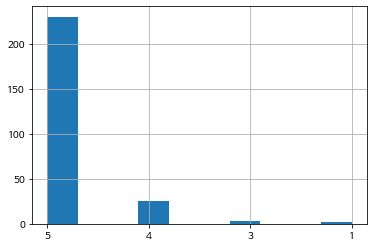

In [ ]:
df['score'].hist()

### market (seller)

In [ ]:
len(df['market'].unique())

15

In [ ]:
df['market'].unique()

array(['LG전자인증점 대명유통', '옥션', 'SK스토아', 'G마켓', '11번가', '위메프', 'GSSHOP',
       'SSG닷컴', '신세계몰', '롯데홈쇼핑', '삼성공식파트너 디지털마트', '롯데백화점', 'CJmall',
       'LG대명유통', 'LG전자인증점 CDS유통'], dtype=object)

In [ ]:
df['market'].value_counts()

11번가             96
G마켓              49
옥션               39
위메프              29
삼성공식파트너 디지털마트     8
롯데홈쇼핑             8
GSSHOP            7
SK스토아             6
LG전자인증점 대명유통      6
신세계몰              4
LG전자인증점 CDS유통     2
롯데백화점             2
CJmall            2
SSG닷컴             1
LG대명유통            1
Name: market, dtype: int64

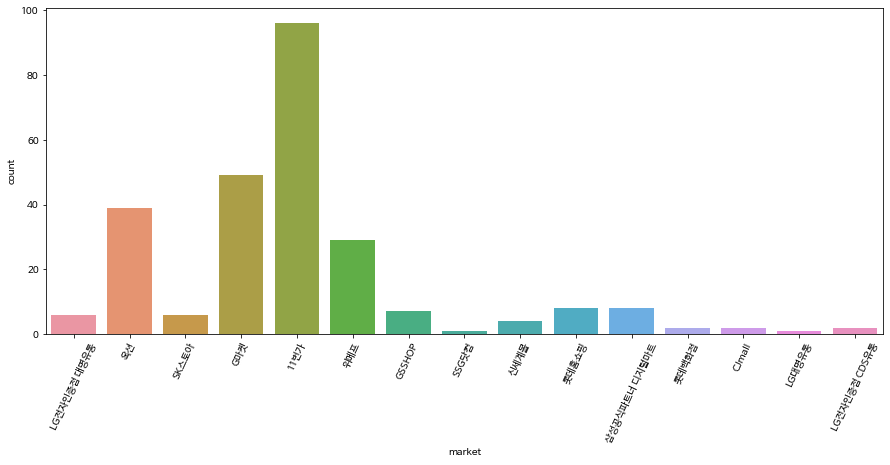

In [ ]:
plt.rcParams['figure.figsize'] = [15,6]
plt.xticks(rotation = 65 )
sns.countplot(x='market', data=df)

### statistical analysis

---
From statistical analysis as below, "LG전자인증점"s have some problem due to low sales rate and customer review score


In [ ]:
df2 = pd.DataFrame(columns=('market seller','total count','average score'))
for i in range(len(df['market'].unique())):
  seller = df['market'].unique()[i]
  tot_count = len(df[df['market']==seller].index)
  avg_score = df[df['market']==seller]['score'].values.astype(np.int16).mean()
  df2.loc[i] = [seller, tot_count, avg_score]

In [ ]:
df2_count = df2.sort_values(by='total count', ascending=False)
df2_count

,market seller,total count,average score
4,11번가,96,4.812500
3,G마켓,49,4.979592
1,옥션,39,4.820513
5,위메프,29,4.724138
9,롯데홈쇼핑,8,5.000000
10,삼성공식파트너 디지털마트,8,5.000000
6,GSSHOP,7,4.714286
0,LG전자인증점 대명유통,6,4.666667
2,SK스토아,6,5.000000
8,신세계몰,4,5.000000


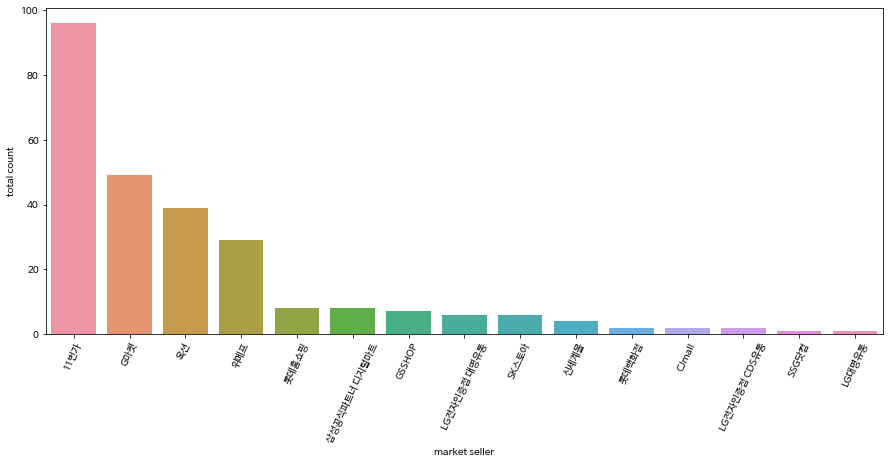

In [ ]:
plt.rcParams['figure.figsize'] = [15,6]
plt.xticks(rotation = 65 )
sns.barplot(x='market seller',y='total count', data=df2_count)

In [ ]:
df2_score = df2.sort_values(by='average score', ascending=False)
df2_score

,market seller,total count,average score
2,SK스토아,6,5.000000
7,SSG닷컴,1,5.000000
8,신세계몰,4,5.000000
9,롯데홈쇼핑,8,5.000000
10,삼성공식파트너 디지털마트,8,5.000000
11,롯데백화점,2,5.000000
12,CJmall,2,5.000000
13,LG대명유통,1,5.000000
3,G마켓,49,4.979592
1,옥션,39,4.820513


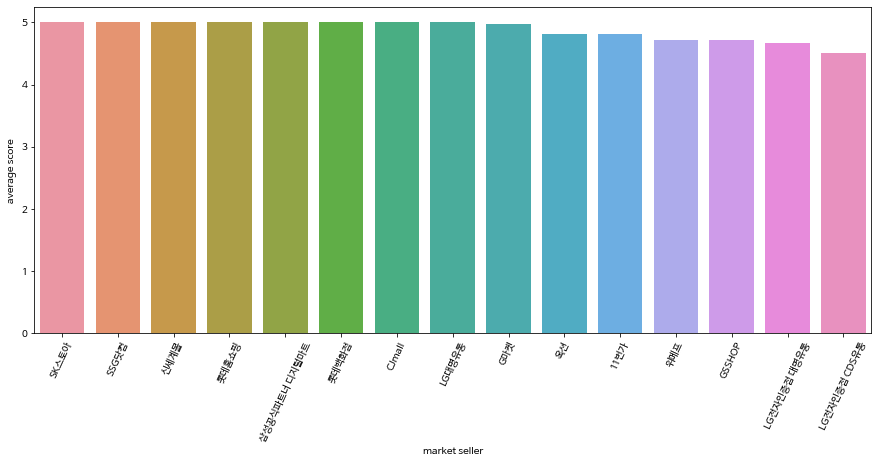

In [ ]:
plt.rcParams['figure.figsize'] = [15,6]
plt.xticks(rotation = 65 )
sns.barplot(x='market seller',y='average score', data=df2_score)